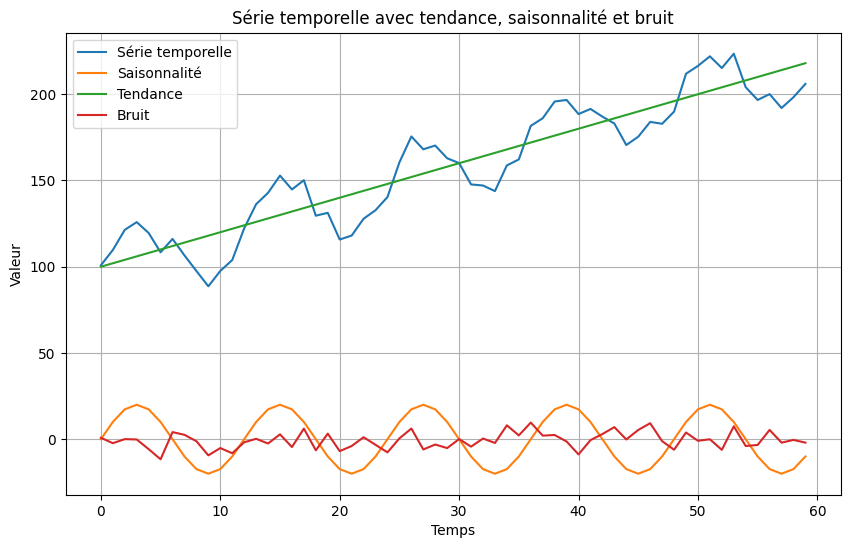

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Paramètres de la série temporelle
n = 60
t = np.arange(n)
beta0 = 100
beta1 = 2
A = 20
P = 12
sigma = 5

trend = beta0 + beta1*t
saison = A*np.sin(2*np.pi*t/P)
noise = np.random.normal(0, sigma, n)

time_series = trend + saison + noise

plt.figure(figsize=(10, 6))
plt.plot(t, time_series, label='Série temporelle')
plt.plot(t, saison, label='Saisonnalité')
plt.plot(t, trend, label='Tendance')
plt.plot(t, noise, label='Bruit')
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.title('Série temporelle avec tendance, saisonnalité et bruit')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#Test SARIMA


In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (example parameters, these might need tuning)
# (p, d, q) order and (P, D, Q, S) seasonal order
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12) # Assuming a seasonal period of 12 (P)

model = SARIMAX(time_series, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Print model summary
print(results.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -150.383
Date:                            Mon, 27 Oct 2025   AIC                            310.765
Time:                                    17:28:36   BIC                            320.016
Sample:                                         0   HQIC                           314.247
                                             - 60                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0983      0.183      0.537      0.591      -0.261       0.457
ma.L1         -0.9994     24.242   

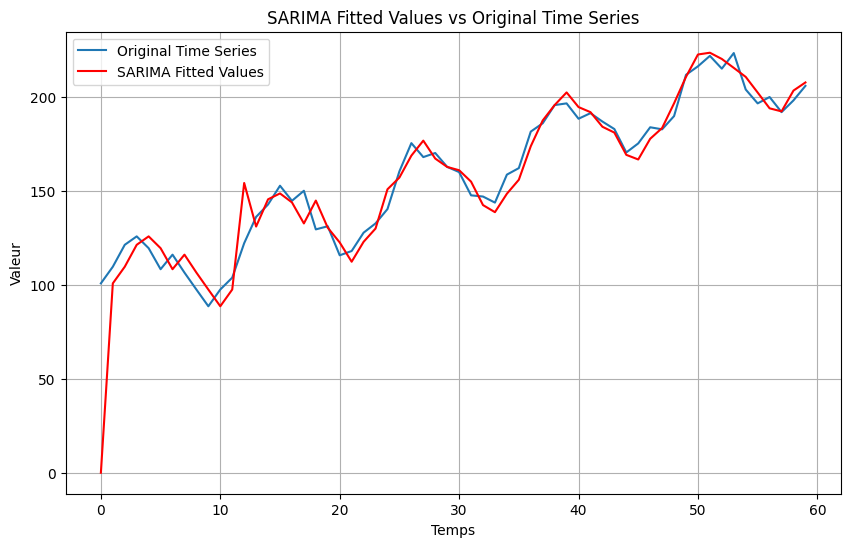

In [21]:
# Visualize the fitted values against the original time series
plt.figure(figsize=(10, 6))
plt.plot(t, time_series, label='Original Time Series')
plt.plot(t, results.fittedvalues, color='red', label='SARIMA Fitted Values')
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.title('SARIMA Fitted Values vs Original Time Series')
plt.legend()
plt.grid(True)
plt.show()

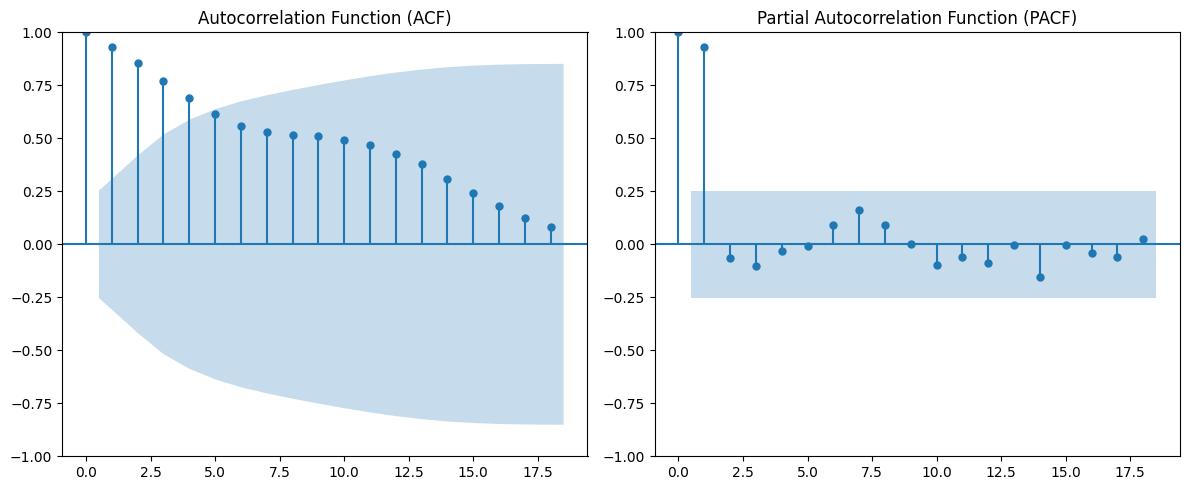

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(time_series, ax=axes[0], title="Autocorrelation Function (ACF)")
plot_pacf(time_series, ax=axes[1], title="Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()
print(sarima_results.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -150.383
Date:                            Mon, 27 Oct 2025   AIC                            310.765
Time:                                    17:28:39   BIC                            320.016
Sample:                                         0   HQIC                           314.247
                                             - 60                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0983      0.183      0.537      0.591      -0.261       0.457
ma.L1         -0.9994     24.242   

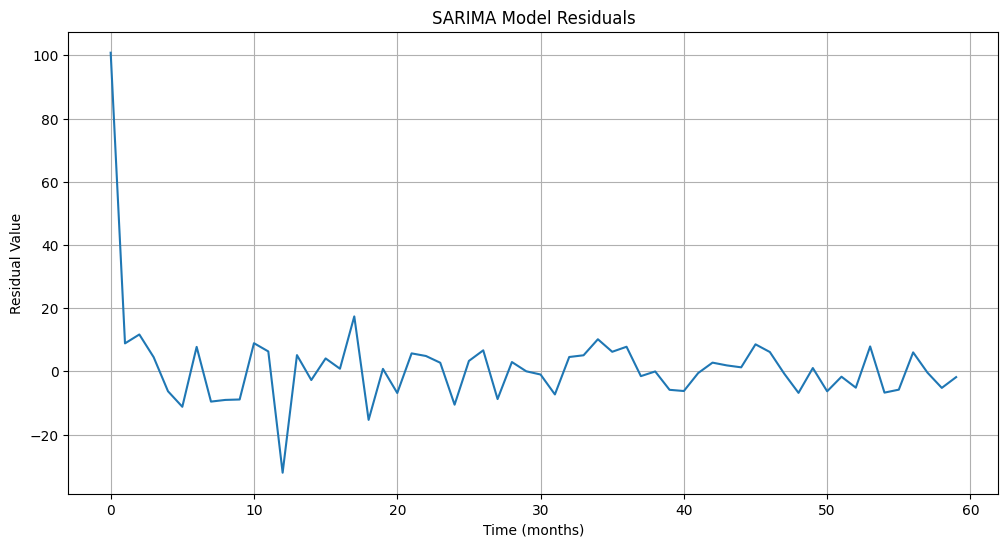


Ljung-Box Test Results:


,lb_stat,lb_pvalue
10,2.877888,0.984153


In [24]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = sarima_results.resid

plt.figure(figsize=(12, 6))
plt.plot(t, residuals)
plt.xlabel("Time (months)")
plt.ylabel("Residual Value")
plt.title("SARIMA Model Residuals")
plt.grid(True)
plt.show()

ljungbox_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung-Box Test Results:")
display(ljungbox_test)

In [ ]:
forecast_steps = 12  # Number of steps to forecast
forecast = sarima_results.get_forecast(steps=forecast_steps)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label="Actual Time Series")
plt.plot(t, sarima_results.fittedvalues, color='red', label="SARIMA Fitted Values")
plt.plot(np.arange(n, n + forecast_steps), mean_forecast, color='green', linestyle='--', label="Forecast")
plt.fill_between(np.arange(n, n + forecast_steps), confidence_intervals[:, 0], confidence_intervals[:, 1], color='green', alpha=0.2)
plt.xlabel("Time (months)")
plt.ylabel("Value")
plt.title("SARIMA Model Forecast")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Remove trend from actual time series
detrended_time_series = time_series - trend

# Get the forecast and confidence intervals
forecast_steps = 12
forecast = sarima_results.get_forecast(steps=forecast_steps)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Remove trend from the forecast
# We need to generate the trend values for the forecast period
forecast_t = np.arange(n, n + forecast_steps)
forecast_trend = beta0 + beta1 * forecast_t
detrended_mean_forecast = mean_forecast - forecast_trend
detrended_confidence_intervals = confidence_intervals - forecast_trend[:, np.newaxis]


plt.figure(figsize=(12, 6))
plt.plot(t, detrended_time_series, label="Detrended Actual Time Series")
plt.plot(np.arange(n, n + forecast_steps), detrended_mean_forecast, color='green', linestyle='--', label="Detrended Forecast")
plt.fill_between(np.arange(n, n + forecast_steps), detrended_confidence_intervals[:, 0], detrended_confidence_intervals[:, 1], color='green', alpha=0.2)
plt.xlabel("Time (months)")
plt.ylabel("Value (Detrended)")
plt.title("Detrended SARIMA Model Forecast")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Remove trend from actual time series
detrended_time_series = time_series - trend

# Remove trend from SARIMA fitted values
detrended_sarima_fitted = sarima_results.fittedvalues - trend

# Remove trend from ARIMA fitted values
detrended_arima_fitted = arima_results.fittedvalues - trend


plt.figure(figsize=(12, 6))
plt.plot(t, detrended_time_series, label="Detrended Actual Time Series")
plt.plot(t, detrended_sarima_fitted, color='red', linestyle='--', label="Detrended SARIMA Fitted Values")
plt.plot(t, detrended_arima_fitted, color='purple', linestyle='--', label="Detrended ARIMA Fitted Values")

# Optional: Add detrended forecasts for comparison over the forecast period
# You would need to calculate detrended forecasts for ARIMA as well if you want to show future comparison

plt.xlabel("Time (months)")
plt.ylabel("Value (Detrended)")
plt.title("Detrended SARIMA vs ARIMA Fitted Values Comparison")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
forecast_steps = 12  # Number of steps to forecast
arima_forecast = arima_results.get_forecast(steps=forecast_steps)
arima_mean_forecast = arima_forecast.predicted_mean
arima_confidence_intervals = arima_forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label="Actual Time Series")
plt.plot(np.arange(n, n + forecast_steps), arima_mean_forecast, color='orange', linestyle='--', label="ARIMA Forecast")
plt.fill_between(np.arange(n, n + forecast_steps), arima_confidence_intervals[:, 0], arima_confidence_intervals[:, 1], color='orange', alpha=0.2)
plt.xlabel("Time (months)")
plt.ylabel("Value")
plt.title("ARIMA Model Forecast")
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'arima_results' is not defined

NameError: name 'arima_mean_forecast' is not defined

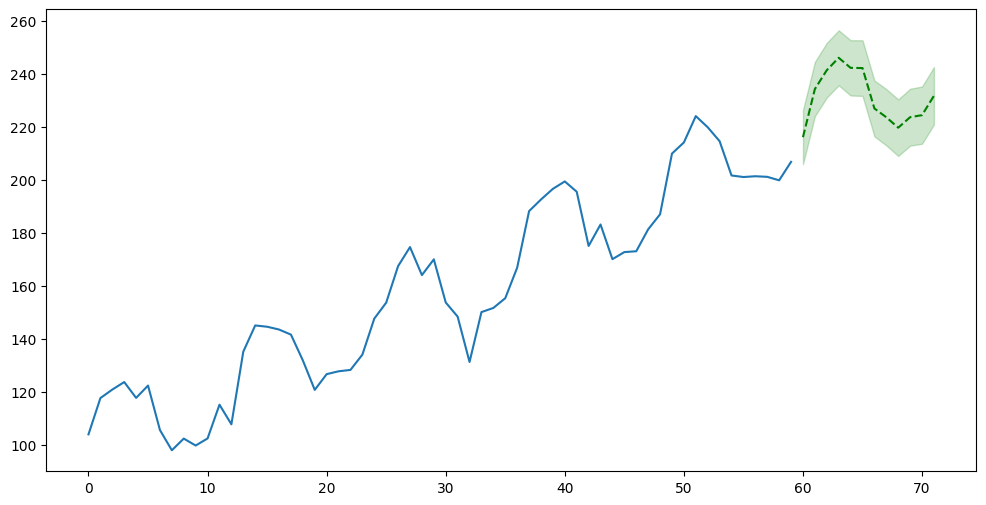

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label="Actual Time Series")
plt.plot(np.arange(n, n + forecast_steps), mean_forecast, color='green', linestyle='--', label="SARIMA Forecast")
plt.fill_between(np.arange(n, n + forecast_steps), confidence_intervals[:, 0], confidence_intervals[:, 1], color='green', alpha=0.2)
plt.plot(np.arange(n, n + forecast_steps), arima_mean_forecast, color='orange', linestyle='--', label="ARIMA Forecast")
plt.fill_between(np.arange(n, n + forecast_steps), arima_confidence_intervals[:, 0], arima_confidence_intervals[:, 1], color='orange', alpha=0.2)
plt.xlabel("Time (months)")
plt.ylabel("Value")
plt.title("SARIMA vs ARIMA Forecast Comparison")
plt.grid(True)
plt.legend()
plt.show()